# Load packages

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the training dataset

In [ ]:
#df = pd.read_csv("../../data/training.csv", sep="\t") # Orginal Training Data
df = pd.read_csv("../../data/processed/training_numeric_cleaned.csv", sep="\t") # Cleaned missing data
#df = pd.read_csv("../../data/processed/training_outlier_removed.csv", sep="\t") # Cleaned outlier data 
#df = pd.read_csv("../../data/processed/training_winsorized.csv", sep="\t") # Winsorization
df.rename(columns={"FLownPassengers": "FlownPassengers"}, inplace=True)

print(df.columns.tolist())



['DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay', 'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route', 'ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']


# Display basic information about the dataset

In [ ]:
df['ActualFlightTime'] = pd.to_numeric(df['ActualFlightTime'], errors='coerce')
df['ActualTotalFuel'] = pd.to_numeric(df['ActualTotalFuel'], errors='coerce')
df['FlownPassengers'] = pd.to_numeric(df['FlownPassengers'], errors='coerce')
df['FlightBagsWeight'] = pd.to_numeric(df['FlightBagsWeight'], errors='coerce')
df['BagsCount'] = pd.to_numeric(df['BagsCount'], errors='coerce')
df['ActualTOW'] = pd.to_numeric(df['ActualTOW'], errors='coerce')


df = df[
    (df['ActualFlightTime'].between(10, 500)) &  
    (df['ActualTotalFuel'].between(500, 14000)) &  
    (df['FlownPassengers'].between(20, 200)) &  
    (df['FlightBagsWeight'].between(0, 3000)) &  
    (df['BagsCount'].between(0, 300)) &  
    (df['ActualTOW'].between(50000, 75000)) 
].copy()


print("Shape:", df.shape)
print(df.info())
df.describe(include='all')


Shape: (23492, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 23492 entries, 0 to 23496
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DepartureDate     23492 non-null  object 
 1   DepartureYear     23492 non-null  int64  
 2   DepartureMonth    23492 non-null  int64  
 3   DepartureDay      23492 non-null  int64  
 4   FlightNumber      23492 non-null  int64  
 5   DepartureAirport  23492 non-null  object 
 6   ArrivalAirport    23492 non-null  object 
 7   Route             23492 non-null  object 
 8   ActualFlightTime  23492 non-null  int64  
 9   ActualTotalFuel   23492 non-null  int64  
 10  ActualTOW         23492 non-null  float64
 11  FlownPassengers   23492 non-null  float64
 12  BagsCount         23492 non-null  float64
 13  FlightBagsWeight  23492 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 2.7+ MB
None


,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FlownPassengers,BagsCount,FlightBagsWeight
count,23492,23492.0,23492.0,23492.000000,23492.000000,23492,23492,23492,23492.000000,23492.000000,23492.000000,23492.000000,23492.000000,23492.000000
unique,15,NaN,NaN,NaN,NaN,176,186,2407,NaN,NaN,NaN,NaN,NaN,NaN
top,07/10/2016,NaN,NaN,NaN,NaN,STN,STN,STN-DUB,NaN,NaN,NaN,NaN,NaN,NaN
freq,1735,NaN,NaN,NaN,NaN,2123,2039,97,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2016.0,10.0,7.979014,4973.307722,NaN,NaN,NaN,107.131406,4681.314490,65311.728205,171.629321,43.762983,560.049208
std,NaN,0.0,0.0,4.341332,3039.696062,NaN,NaN,NaN,42.456561,1784.304514,2451.188974,10.579835,24.867730,319.810072
min,NaN,2016.0,10.0,1.000000,11.000000,NaN,NaN,NaN,15.000000,720.000000,58465.000000,139.000000,1.000000,10.000000
25%,NaN,2016.0,10.0,4.000000,2264.000000,NaN,NaN,NaN,74.000000,3280.000000,63526.000000,166.000000,24.000000,310.000000
50%,NaN,2016.0,10.0,8.000000,4892.000000,NaN,NaN,NaN,105.000000,4560.000000,65267.000000,174.000000,39.000000,490.000000
75%,NaN,2016.0,10.0,12.000000,7763.000000,NaN,NaN,NaN,137.000000,5927.000000,67063.000000,179.000000,60.000000,770.000000


# Check for missing values

In [28]:
df.replace("(null)", np.nan, inplace=True)
missing_counts = df.isnull().sum()
print("Missing values in numeric columns:\n", missing_counts)

Missing values in numeric columns:
 DepartureDate       0
DepartureYear       0
DepartureMonth      0
DepartureDay        0
FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
Route               0
ActualFlightTime    0
ActualTotalFuel     0
ActualTOW           0
FlownPassengers     0
BagsCount           0
FlightBagsWeight    0
dtype: int64


# Numeric columns

In [29]:
num_cols = ['ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'FlightBagsWeight', 'BagsCount', 'ActualTOW']

# Cleaning missing data

In [30]:
df = df.dropna(subset=num_cols)

# Display info about cleaning data from missing data

In [31]:
df = df.drop(columns=[ "DepartureDate","DepartureYear","DepartureMonth","DepartureDay","ArrivalAirport","DepartureAirport","FlightNumber","Route"])
print("Shape:", df.shape)
print(df.info())
df.describe(include='all')

Shape: (23492, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 23492 entries, 0 to 23496
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualFlightTime  23492 non-null  int64  
 1   ActualTotalFuel   23492 non-null  int64  
 2   ActualTOW         23492 non-null  float64
 3   FlownPassengers   23492 non-null  float64
 4   BagsCount         23492 non-null  float64
 5   FlightBagsWeight  23492 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.3 MB
None


,ActualFlightTime,ActualTotalFuel,ActualTOW,FlownPassengers,BagsCount,FlightBagsWeight
count,23492.000000,23492.000000,23492.000000,23492.000000,23492.000000,23492.000000
mean,107.131406,4681.314490,65311.728205,171.629321,43.762983,560.049208
std,42.456561,1784.304514,2451.188974,10.579835,24.867730,319.810072
min,15.000000,720.000000,58465.000000,139.000000,1.000000,10.000000
25%,74.000000,3280.000000,63526.000000,166.000000,24.000000,310.000000
50%,105.000000,4560.000000,65267.000000,174.000000,39.000000,490.000000
75%,137.000000,5927.000000,67063.000000,179.000000,60.000000,770.000000
max,238.000000,10008.000000,72378.000000,189.000000,114.000000,1510.000000



# Histograms for numerical variables

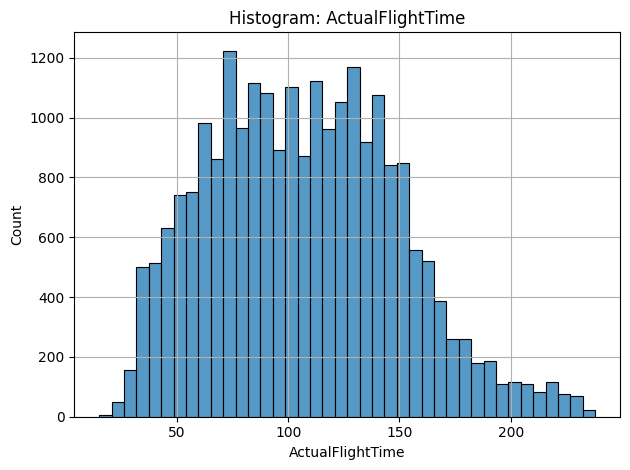

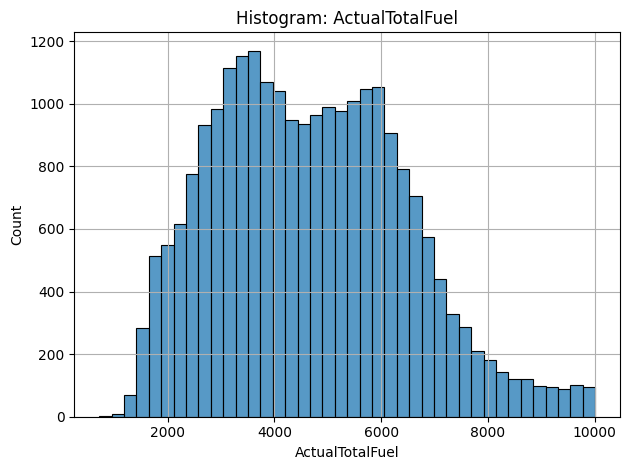

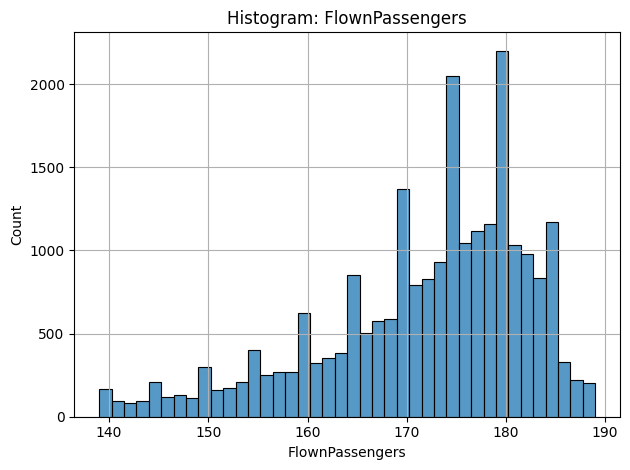

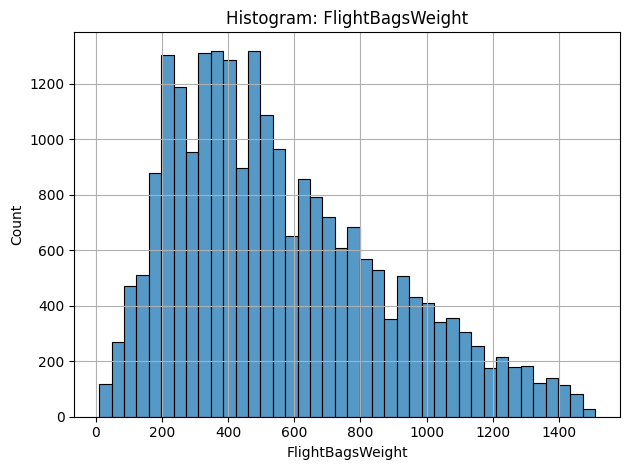

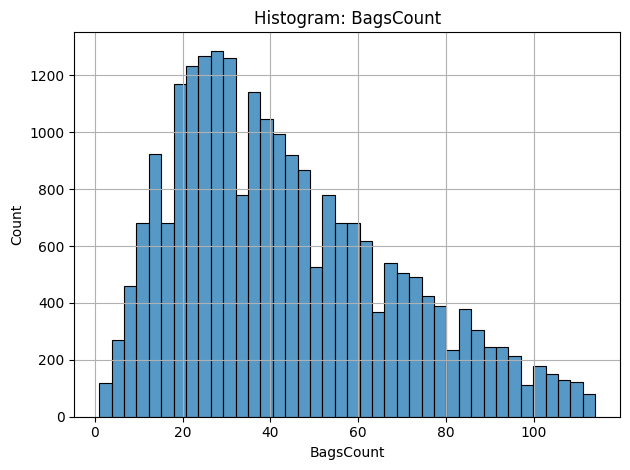

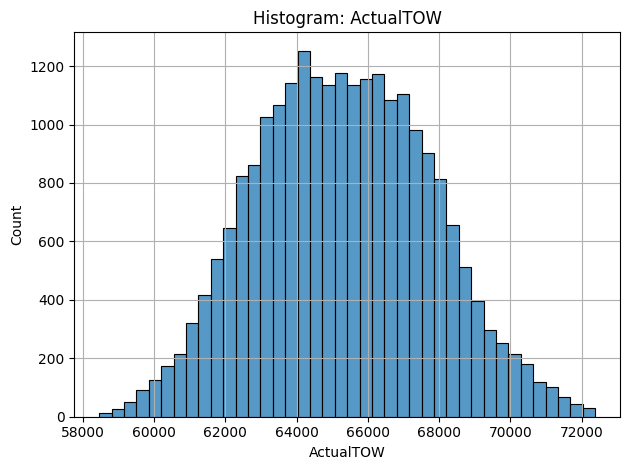

In [ ]:



plt.Figure(figsize=(6, 4))
sns.histplot(df['ActualFlightTime'], bins=40)
plt.title("Histogram: ActualFlightTime")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.Figure(figsize=(6, 4))
sns.histplot(df['ActualTotalFuel'], bins=40)
plt.title("Histogram: ActualTotalFuel")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.Figure(figsize=(6, 4))
sns.histplot(df['FlownPassengers'], bins=40)
plt.title("Histogram: FlownPassengers")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.Figure(figsize=(6, 4))
sns.histplot(df['FlightBagsWeight'], bins=40)
plt.title("Histogram: FlightBagsWeight")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.Figure(figsize=(6, 4))
sns.histplot(df['BagsCount'], bins=40)
plt.title("Histogram: BagsCount")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.Figure(figsize=(6, 4))
sns.histplot(df['ActualTOW'], bins=40)
plt.title("Histogram: ActualTOW")
plt.grid(True)
plt.tight_layout()
plt.show()





# Boxplots for detecting outliers

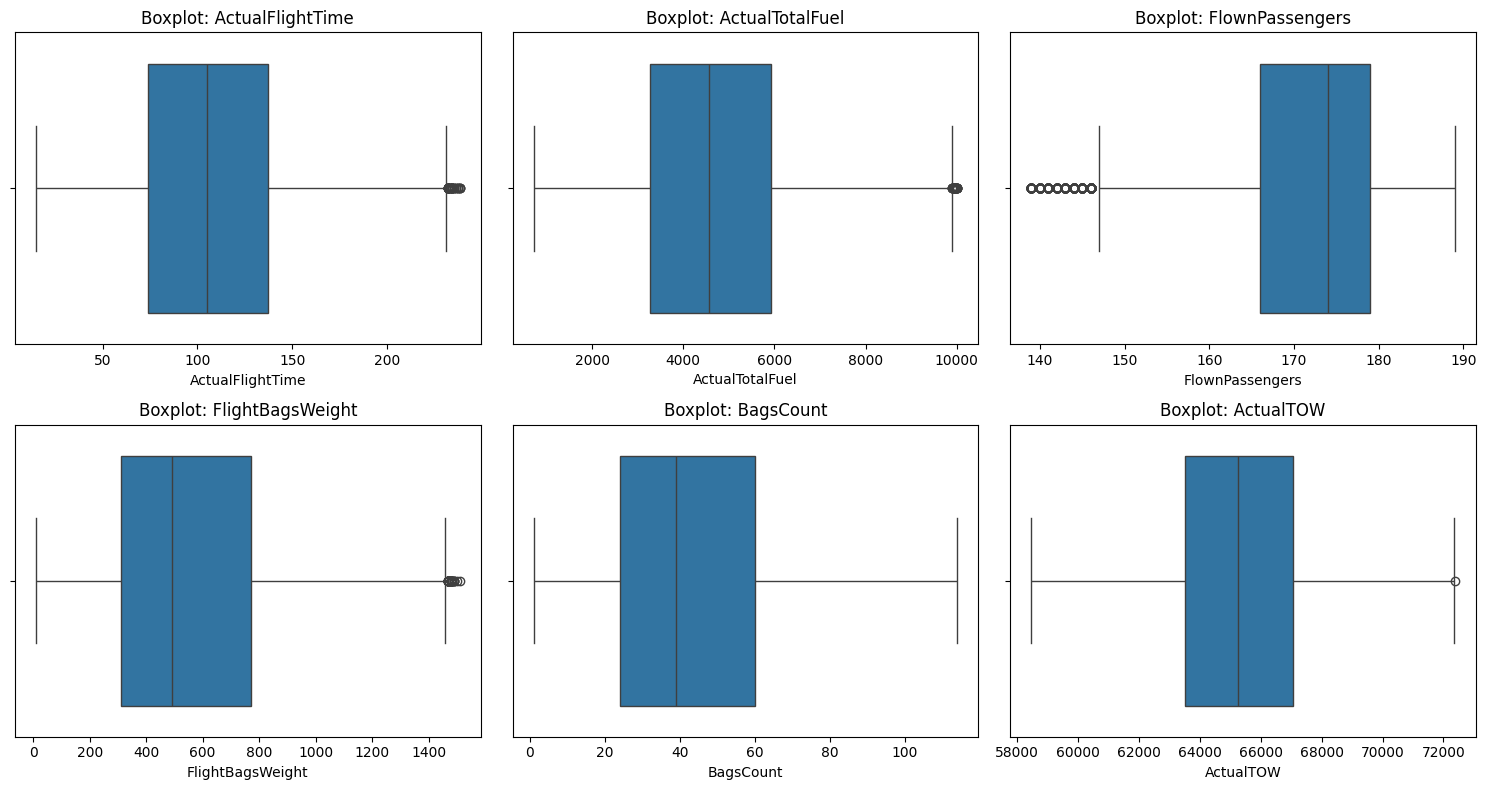

In [33]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


# Correlation heatmap

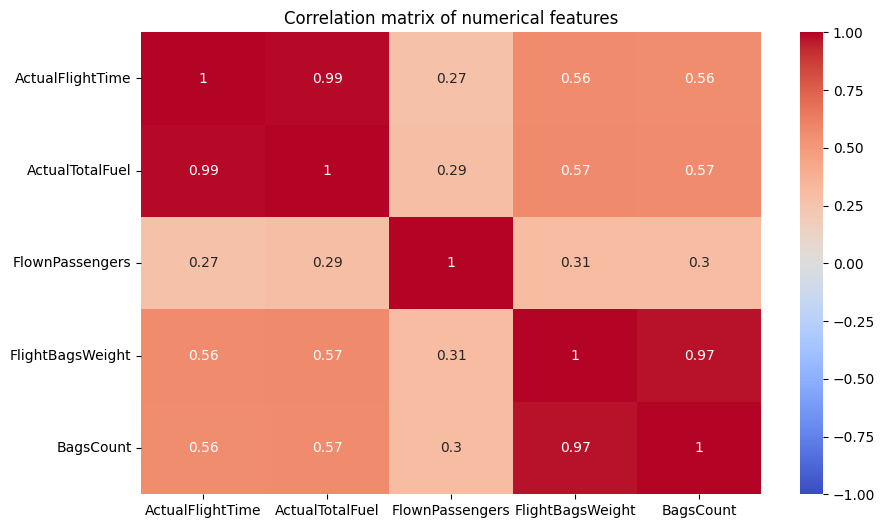

In [34]:
df.replace("(null)", np.nan, inplace=True)
#num_cols = ['ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'FlightBagsWeight', 'BagsCount', 'ActualTOW']
num_cols = ['ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'FlightBagsWeight', 'BagsCount']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

corr = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("Correlation matrix of numerical features")
plt.show()

# Scatter plot: Fuel consumption vs Take-Off Weight

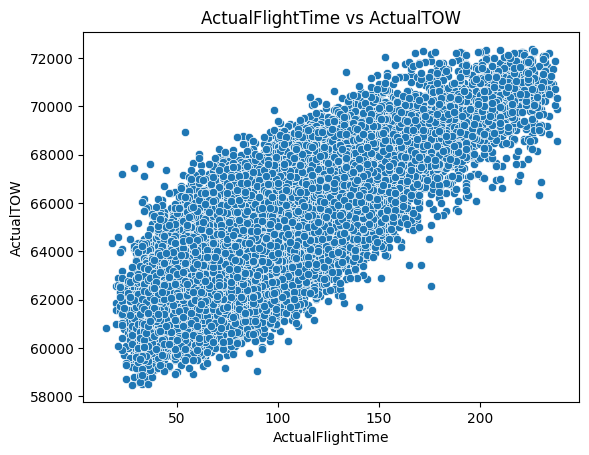

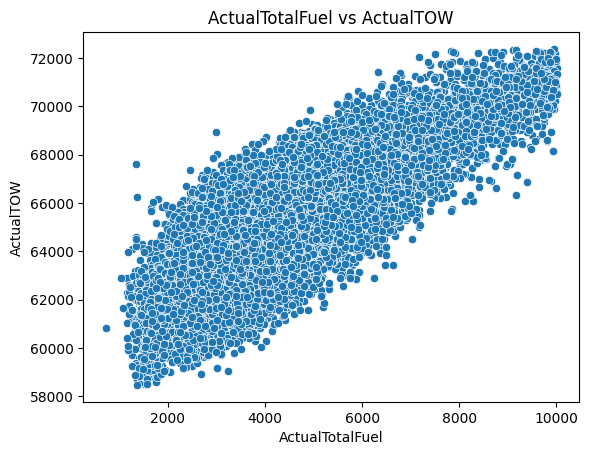

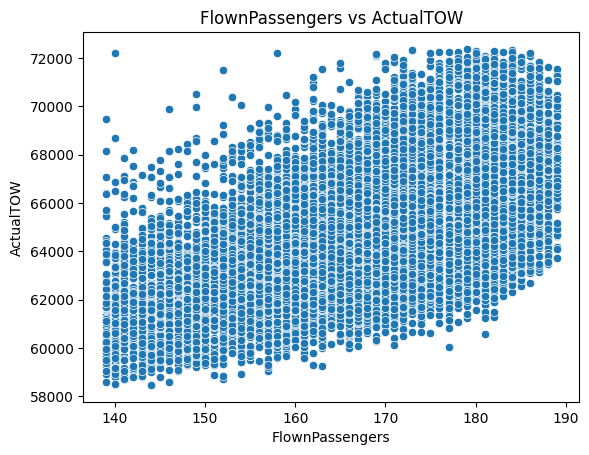

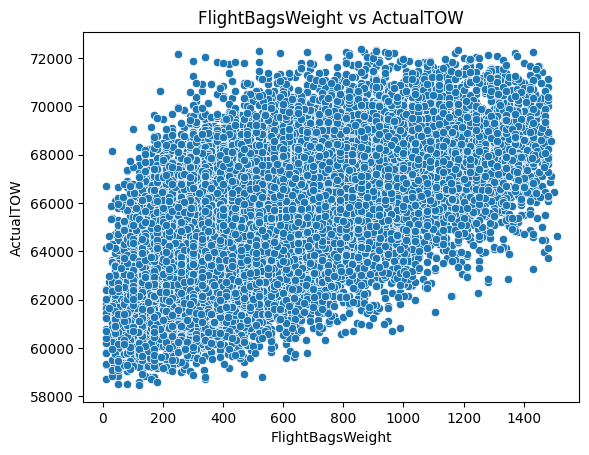

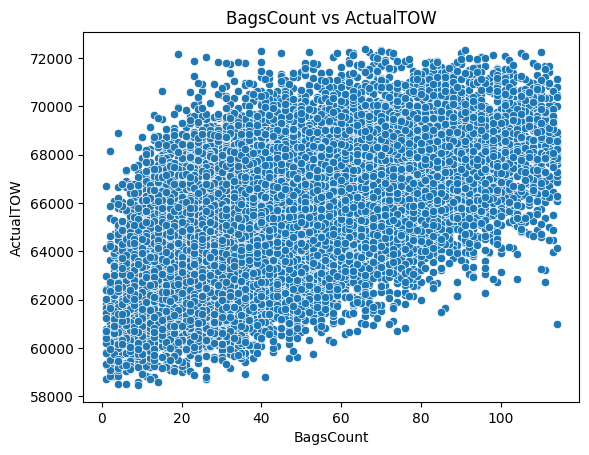

In [35]:
sns.scatterplot(x='ActualFlightTime', y='ActualTOW', data=df)
plt.title("ActualFlightTime vs ActualTOW")
plt.show()


sns.scatterplot(x='ActualTotalFuel', y='ActualTOW', data=df)
plt.title("ActualTotalFuel vs ActualTOW")
plt.show()

sns.scatterplot(x='FlownPassengers', y='ActualTOW', data=df)
plt.title("FlownPassengers vs ActualTOW")
plt.show()

sns.scatterplot(x='FlightBagsWeight', y='ActualTOW', data=df)
plt.title("FlightBagsWeight vs ActualTOW")
plt.show()

sns.scatterplot(x='BagsCount', y='ActualTOW', data=df)
plt.title("BagsCount vs ActualTOW")
plt.show()

# Scatter plot: Number of passengers vs Take-Off Weight

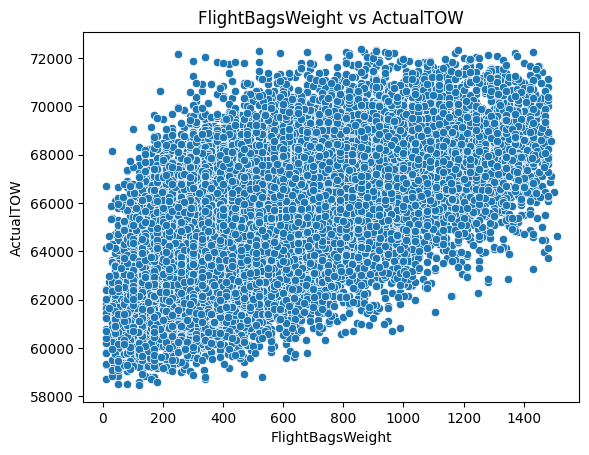

In [36]:
sns.scatterplot(x='FlightBagsWeight', y='ActualTOW', data=df)
plt.title("FlightBagsWeight vs ActualTOW")
plt.show()